In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import cv2 as cv

In [2]:
path_classes = '../Img/GoodImg/Bmp/'
classes_names = os.listdir(path_classes)
dic_imgs ={}

for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))
    print "class: ", name_class, " total samples: ", len(dic_imgs[classes_names[i]])

class:  Sample026  total samples:  159
class:  Sample029  total samples:  342
class:  Sample027  total samples:  35
class:  Sample023  total samples:  149
class:  Sample003  total samples:  70
class:  Sample025  total samples:  382
class:  Sample030  total samples:  312
class:  Sample013  total samples:  215
class:  Sample009  total samples:  32
class:  Sample006  total samples:  64
class:  Sample032  total samples:  84
class:  Sample037  total samples:  24
class:  Sample007  total samples:  64
class:  Sample004  total samples:  50
class:  Sample022  total samples:  215
class:  Sample010  total samples:  34
class:  Sample031  total samples:  92
class:  Sample033  total samples:  67
class:  Sample012  total samples:  115
class:  Sample035  total samples:  67
class:  Sample016  total samples:  79
class:  Sample002  total samples:  79
class:  Sample017  total samples:  143
class:  Sample021  total samples:  92
class:  Sample005  total samples:  47
class:  Sample018  total samples:  193
cl

In [3]:
X=[];
Y=[];
for i in range(len(classes_names)):
    for j in range(len(dic_imgs[classes_names[i]])):

        path_image = path_classes+classes_names[i]+'/'+dic_imgs[classes_names[i]][j];
        img=cv.imread(path_image);
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB);
        img=cv.resize(img,(32,32));
        X.append(img)
        Y.append(i)

X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [28]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size)
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(4655, 32, 32, 3) (1164, 32, 32, 3) (4655,) (1164,)


In [29]:
X_train = X_train.reshape([-1, 32, 32, 3])
X_test = X_test.reshape([-1, 32, 32, 3])
10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [39]:
model=  keras.models.Sequential()
model.add(keras.layers.Conv2D(30, (5, 5), input_shape=(32, 32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='tanh'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(37, activation='softmax'))

model.summary();

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 40)        3040      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 20)        7220      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 20)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [40]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,
                    validation_data=(X_test, Y_test))

Train on 4655 samples, validate on 1164 samples
Epoch 1/100
4655/4655 [==============================] - 4s 770us/sample - loss: 3.5948 - acc: 0.0477 - val_loss: 3.5863 - val_acc: 0.0653
Epoch 2/100
4655/4655 [==============================] - 3s 718us/sample - loss: 3.5756 - acc: 0.0614 - val_loss: 3.5634 - val_acc: 0.0653
Epoch 3/100
4655/4655 [==============================] - 3s 724us/sample - loss: 3.5512 - acc: 0.0655 - val_loss: 3.5346 - val_acc: 0.0653
Epoch 4/100
4655/4655 [==============================] - 3s 731us/sample - loss: 3.5223 - acc: 0.0666 - val_loss: 3.5028 - val_acc: 0.0653
Epoch 5/100
4655/4655 [==============================] - 3s 737us/sample - loss: 3.4937 - acc: 0.0651 - val_loss: 3.4699 - val_acc: 0.0653
Epoch 6/100
4655/4655 [==============================] - 3s 748us/sample - loss: 3.4634 - acc: 0.0700 - val_loss: 3.4408 - val_acc: 0.0653
Epoch 7/100
4655/4655 [==============================] - 3s 740us/sample - loss: 3.4300 - acc: 0.0767 - val_loss: 3.41

4655/4655 [==============================] - 3s 712us/sample - loss: 3.2432 - acc: 0.1263 - val_loss: 3.2131 - val_acc: 0.1203
Epoch 60/100
4655/4655 [==============================] - 3s 709us/sample - loss: 3.2407 - acc: 0.1265 - val_loss: 3.2091 - val_acc: 0.1211
Epoch 61/100
4655/4655 [==============================] - 3s 705us/sample - loss: 3.2369 - acc: 0.1263 - val_loss: 3.2031 - val_acc: 0.1220
Epoch 62/100
4655/4655 [==============================] - 3s 703us/sample - loss: 3.2302 - acc: 0.1310 - val_loss: 3.1977 - val_acc: 0.1220
Epoch 63/100
4655/4655 [==============================] - 3s 709us/sample - loss: 3.2232 - acc: 0.1302 - val_loss: 3.1906 - val_acc: 0.1246
Epoch 64/100
4655/4655 [==============================] - 3s 704us/sample - loss: 3.2146 - acc: 0.1345 - val_loss: 3.1844 - val_acc: 0.1297
Epoch 65/100
4655/4655 [==============================] - 3s 707us/sample - loss: 3.2106 - acc: 0.1349 - val_loss: 3.1758 - val_acc: 0.1271
Epoch 66/100
4655/4655 [=========

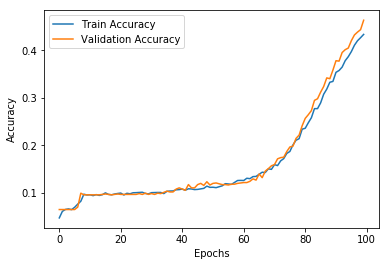

In [41]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

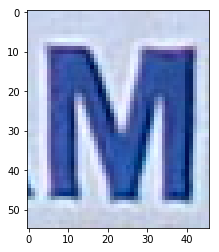

In [9]:
ima=cv.imread('../Img/GoodImg/Bmp/Sample023/img023-00006.png')
ima=cv.cvtColor(ima,cv.COLOR_BGR2RGB)
plt.imshow(ima)
ima1=cv.imread('../Img/GoodImg/Bmp/Sample023/img023-00006.png')
ima1=cv.cvtColor(ima,cv.COLOR_BGR2RGB)


In [27]:
features_res = model.predict(X_test[:60])
for i in features_res:
    print max(i)

0.9951662
0.4357615
0.6077867
0.99716777
0.75449234
0.9304629
0.451641
0.54312795
0.82807636
0.71088094
0.8777675
0.45619607
0.92435485
0.8639799
0.9399285
0.47395
0.5106618
0.9433009
0.61255026
0.85260653
0.9739896
0.74955773
0.8727549
0.9639097
0.80386615
0.5558042
0.96807486
0.925825
0.3578661
0.9919967
0.96587867
0.8456102
0.99516475
0.9672985
0.992898
0.9950623
0.97203785
0.98423195
0.61209816
0.997733
0.4350123
0.23114559
0.99321026
0.57593757
0.5894069
0.44527605
0.8738807
0.9871199
0.90664953
0.58219814
0.9276878
0.8802898
0.9577247
0.514357
0.44324672
0.92784053
0.9479752
0.9736491
0.31880987
0.9999262
